In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from google.colab import drive

drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
from keras.models import load_model

#/gdrive/My Drive/cats_and_dogs_small_cnn.h5 를 읽어서 model에 저장
model = load_model('./gdrive/My Drive/ai/workspace/cats_and_dogs_small_cnn.h5')

In [0]:
# 기억을 되살리기 위해서 모델 구조를 출력합니다
model.summary()  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)           

In [0]:
#테스트 이미지 경로
img_path = './gdrive/My Drive/ai/workspace/data/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [0]:
from keras.preprocessing import image
import numpy as np

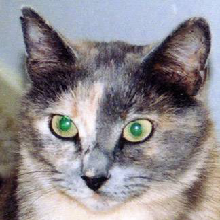

In [0]:
#image.load_img(): 이미지를 읽어서 2차원 배열에 담아서 리턴
#image.load_img(img_path, target_size=(이미지가로, 이미지세로))
img = image.load_img(img_path, target_size=(220, 220))
img

In [0]:
#image.img_to_array(img) :이미지를 3차원 배열로 변환해서 리턴합니다
#img: 3차원 배열로 변환하려는 이미지
img_tensor = image.img_to_array(img)
img_tensor.shape

(220, 220, 3)

In [0]:
#img_tensor(): 이미지를 4차원 배열로 변환해서 리턴
#np.expand_dims(img_tensor, axis=0) 
#img: 3차원 배열로 변환하려는 이미지
#axis=0 : 이미지의 개수만큼 shape 0에 추가

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor.shape

(1, 220, 220, 3)

In [0]:
# 이미지를 255로 나눠서 img_tensor에 대입
img_tensor = img_tensor/255.

# 이미지 텐서의 크기는 (1, 150, 150, 3)입니다
print(img_tensor.shape)

(1, 220, 220, 3)


In [0]:
model.predict(img_tensor)

array([[0.60538375]], dtype=float32)

In [0]:
#첫번째 이미지 출력
img_tensor[0]

array([[[0.6392157 , 0.6784314 , 0.7254902 ],
        [0.627451  , 0.6666667 , 0.7137255 ],
        [0.61960787, 0.65882355, 0.7058824 ],
        ...,
        [0.78039217, 0.84313726, 0.94509804],
        [0.78039217, 0.84313726, 0.94509804],
        [0.78039217, 0.84313726, 0.94509804]],

       [[0.64705884, 0.6862745 , 0.73333335],
        [0.63529414, 0.6745098 , 0.72156864],
        [0.627451  , 0.6666667 , 0.7137255 ],
        ...,
        [0.78431374, 0.84705883, 0.9490196 ],
        [0.78431374, 0.84705883, 0.9490196 ],
        [0.78431374, 0.84705883, 0.9490196 ]],

       [[0.6313726 , 0.67058825, 0.7176471 ],
        [0.61960787, 0.65882355, 0.7058824 ],
        [0.6156863 , 0.654902  , 0.7019608 ],
        ...,
        [0.7882353 , 0.8509804 , 0.9529412 ],
        [0.7882353 , 0.8509804 , 0.9529412 ],
        [0.7882353 , 0.8509804 , 0.9529412 ]],

       ...,

       [[0.2784314 , 0.20392157, 0.21176471],
        [0.25490198, 0.18039216, 0.19607843],
        [0.22745098, 0

In [0]:
import matplotlib.pyplot as plt

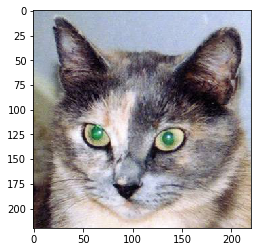

In [0]:
#plt.imshow(출력이미지) :이미지를 출력
plt.imshow(img_tensor[0])
plt.show()

In [0]:
#CNN연산의 처음부터 6개의 필터를 리턴합니다
model.layers[:6] 

In [0]:
##CNN연산의 첫번째 필터 (3x3 , 32개) 리턴
model.layers[0].output

<tf.Tensor 'conv2d_8/Relu:0' shape=(?, 220, 220, 32) dtype=float32>

In [0]:
from keras import models

# 상위 6개 층의 필터 리턴
layer_outputs = [layer.output for layer in model.layers[:6]]
layer_outputs

[<tf.Tensor 'conv2d_8/Relu:0' shape=(?, 220, 220, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 110, 110, 32) dtype=float32>,
 <tf.Tensor 'conv2d_9/Relu:0' shape=(?, 110, 110, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10/MaxPool:0' shape=(?, 55, 55, 64) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(?, 55, 55, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11/MaxPool:0' shape=(?, 28, 28, 128) dtype=float32>]

In [0]:
# model.input : 입력 이미지
#layer_outputs : 상위 6개 필터

#models.Model(inputs=model.input, outputs=layer_outputs) : 입력 이미지를 상위 6개 필터 연산을 해서 연산 결과 리턴할
#객체 activation_model 를 생성

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model

In [0]:
# activation_model.predict(img_tensor) : img_tensor를 상위 6개 필터연산을 하고 결과를 리턴
#activations : 상위 6개의 필터 연산을 수행 한 결과

activations = activation_model.predict(img_tensor)
activations

[array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 1.92584805e-02],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 2.91840825e-03, 1.01597123e-01],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 4.73735761e-03, 9.72932056e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 1.76525675e-04, 1.27573952e-01],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 1.68597326e-05, 1.27366170e-01],
          [0.00000000e+00, 0.00000000e+00, 6.21229783e-02, ...,
           0.00000000e+00, 0.00000000e+00, 3.47052723e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000

In [0]:
#첫번째 필터(3x3, 32) 와 연산한 결과를 first_layer_activation 에 저장
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 220, 220, 32)


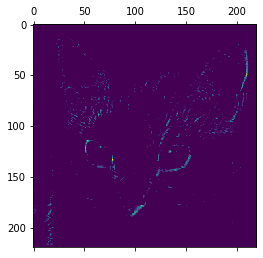

In [0]:
#첫번째 필터와 연산 한 결과중 4번째 필터와 이미지 연산 결과 출력
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

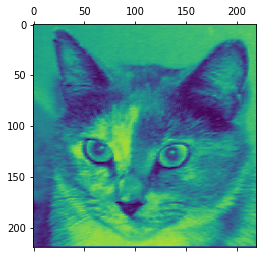

In [0]:
#첫번째 필터와 연산 한 결과중 16번째 필터와 이미지 연산 결과 출력
plt.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')
plt.show()

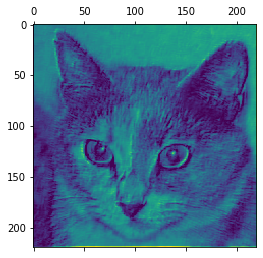

In [0]:
#첫번째 필터와 연산 한 결과중 8번째 필터와 이미지 연산 결과 출력
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')
plt.show()

In [0]:
#레이어의 이름 출력
for layer in model.layers:
    print(layer.name)

conv2d_8
max_pooling2d_9
conv2d_9
max_pooling2d_10
conv2d_10
max_pooling2d_11
flatten_3
dropout_4
dense_5
dropout_5
dense_6


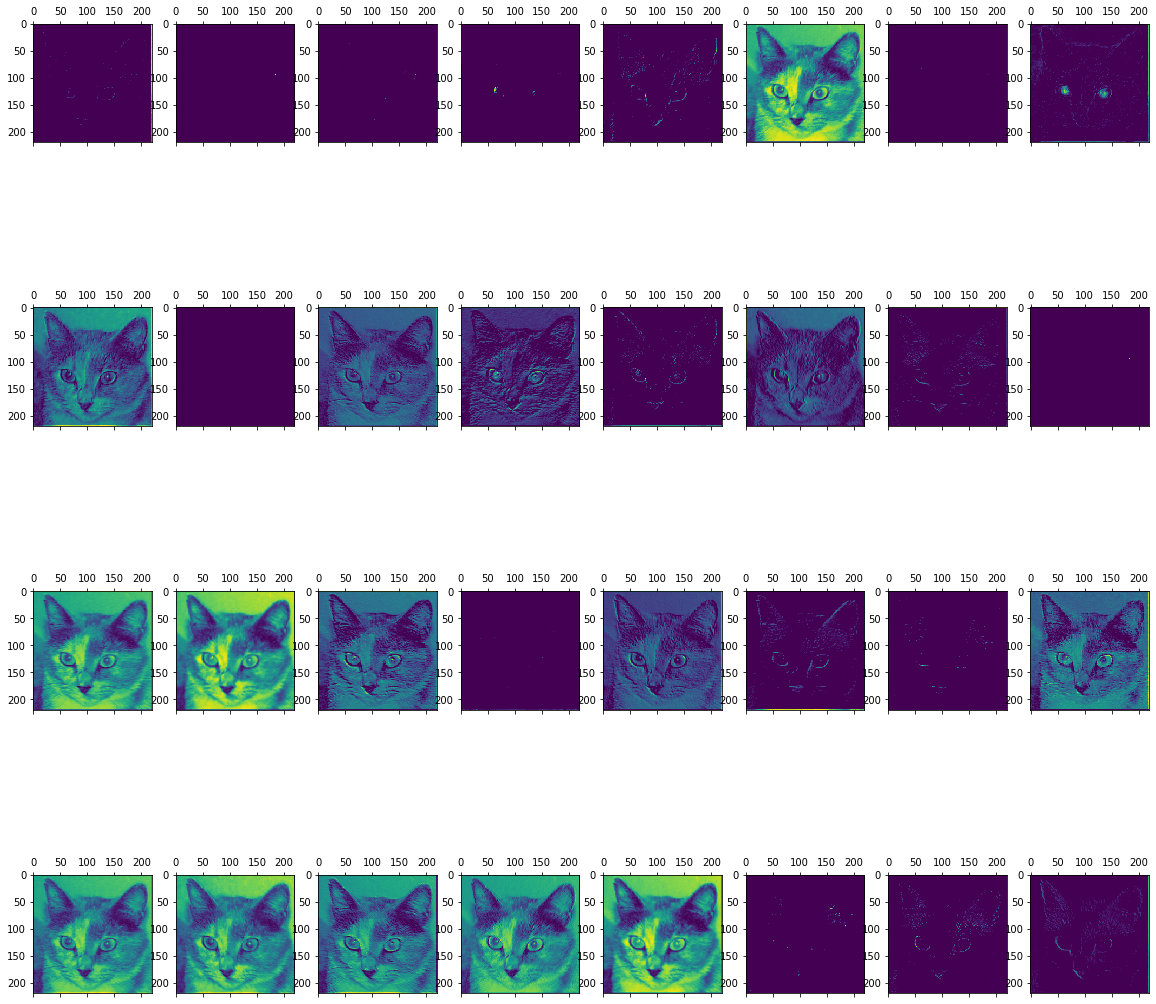

In [0]:
#첫번째 필터(3x3 32) 와 연산 결과를 layer_out에 저장
layer_out=activations[0]

#이미지를 출력할 객체
fig = plt.figure(figsize=(20,20))

i=0
for i in range(32):
    #4줄 8칸으로 나누고 i+1번째 이미지를 그림
    subplot = fig.add_subplot(4, 8, i + 1)
    #이미지와 필터 연산 결과 출력     
    subplot.matshow(layer_out[0, :, :, i], cmap='viridis')

#그래프를 화면에 그림
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


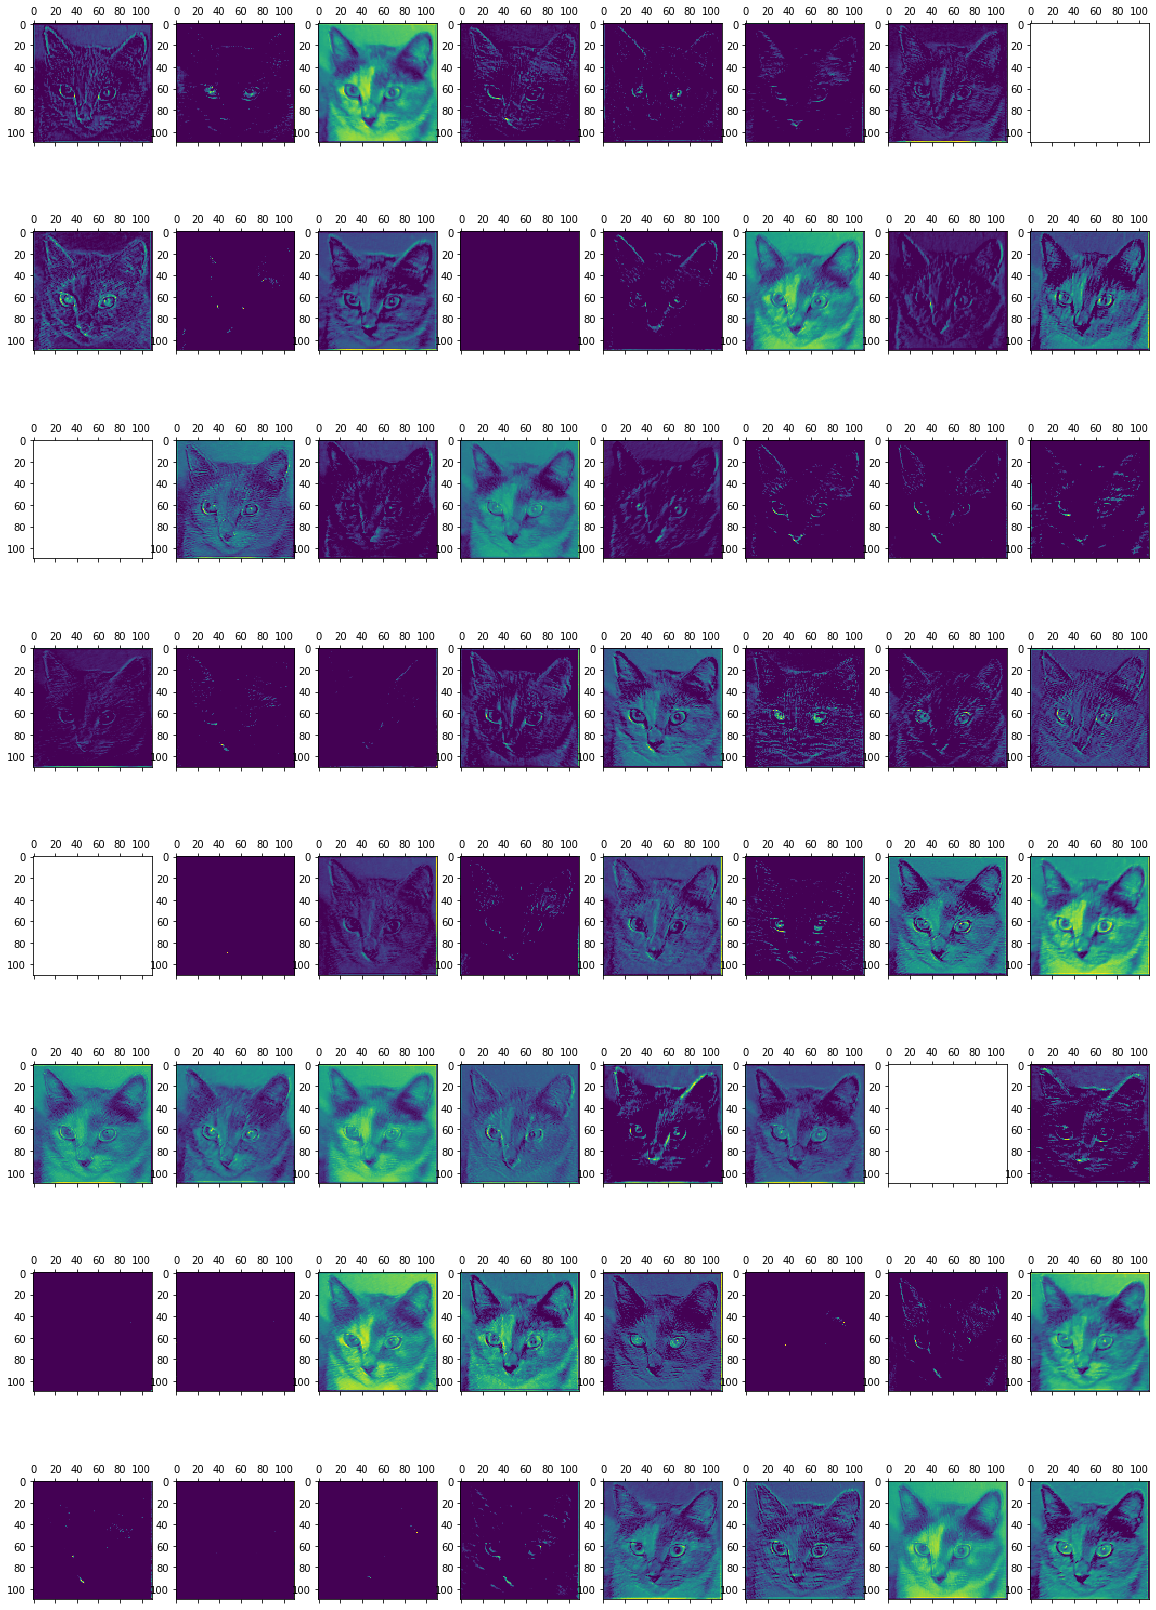

In [0]:
layer_out=activations[2]

#이미지를 출력할 객체
fig = plt.figure(figsize=(20,30))

i=0
for i in range(64):
    #4줄 8칸으로 나누고 i+1번째 이미지를 그림
    subplot = fig.add_subplot(8, 8, i + 1)
    #이미지와 필터 연산 결과 출력     
    subplot.matshow(layer_out[0, :, :, i], cmap='viridis')

#그래프를 화면에 그림
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


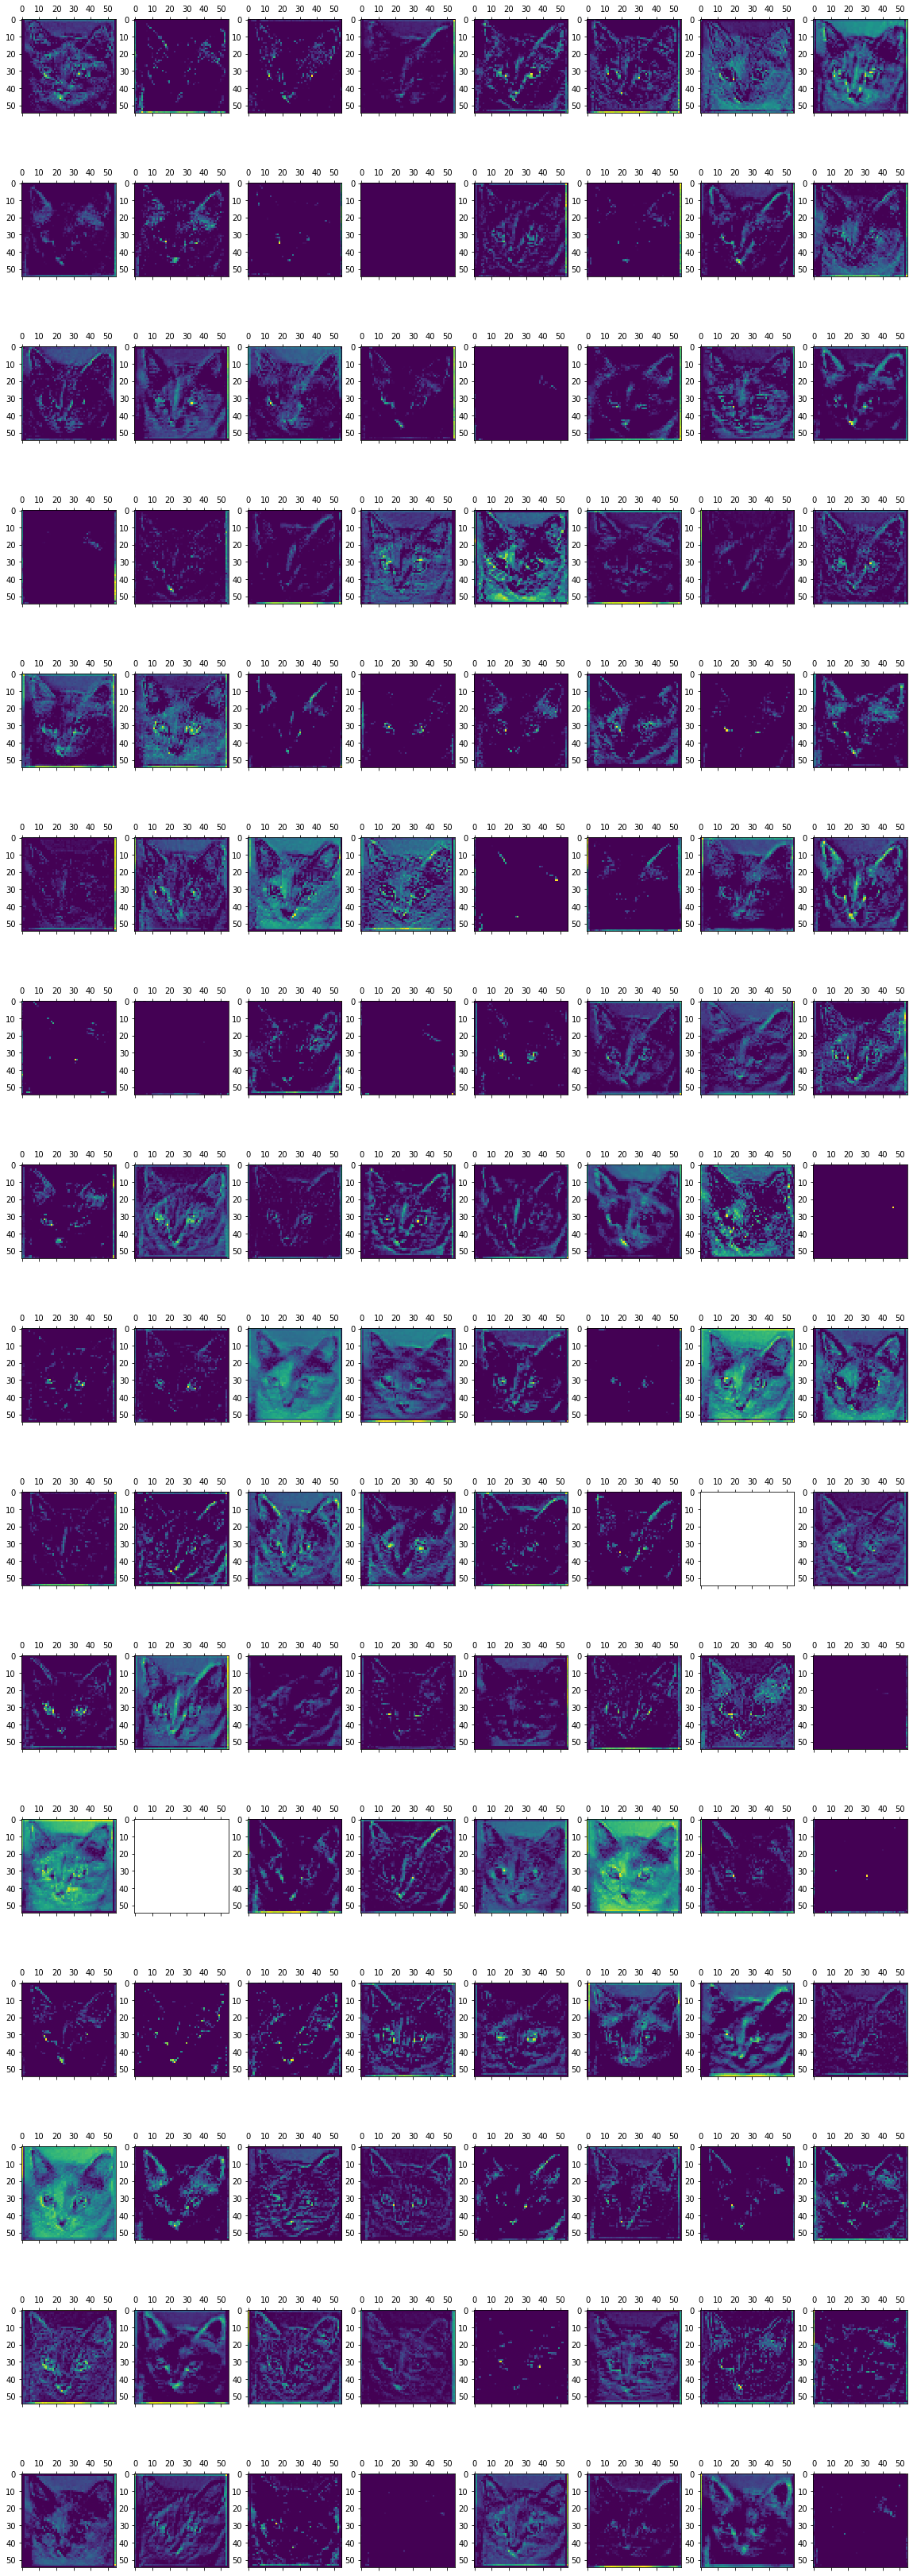

In [0]:
layer_out=activations[4]

#이미지를 출력할 객체
fig = plt.figure(figsize=(20,60))

i=0
for i in range(128):
    #4줄 8칸으로 나누고 i+1번째 이미지를 그림
    subplot = fig.add_subplot(16, 8, i + 1)
    #이미지와 필터 연산 결과 출력     
    subplot.matshow(layer_out[0, :, :, i], cmap='viridis')

#그래프를 화면에 그림
plt.show()